In [1]:
import pandas as pd
import re

df = pd.read_csv("netflix_reviews.csv")  # 파일 불러오기

def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

df['content'] = df['content'].apply(preprocess_text)

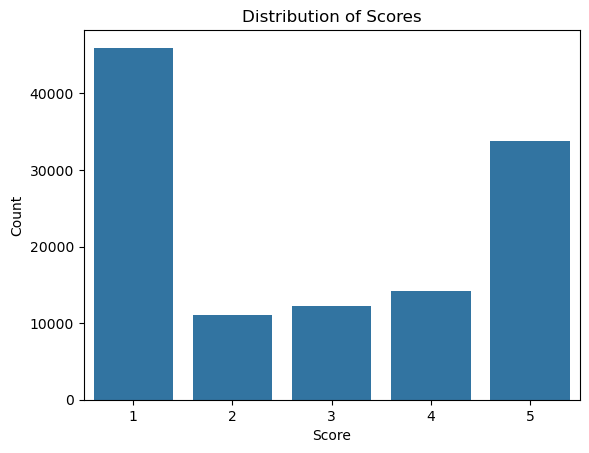

In [2]:
import seaborn as sns  # 그래프를 그리기 위한 seaborn 라이브러리 임포트 (없으면 설치 바랍니다)
import matplotlib.pyplot as plt  # 그래프 표시를 위한 pyplot 임포트

score_counts = df['score'].value_counts().reset_index()
score_counts.columns = ['Score', 'Count']

sns.barplot(x='Score', y='Count', data=score_counts)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [4]:
# Text preprocessing
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['content'])
X = tokenizer.texts_to_sequences(df['content'])
X = pad_sequences(X)

In [5]:
# Labels
y = df['score'].values

# Train-test split
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

# Model definition
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="linear"))  # Use 'linear' for regression

model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mae"])


In [13]:
# Model training
model.fit(X_train, y_train, epochs=10, batch_size=4, verbose=1)

Epoch 1/10
23427/23427 [==============================] - 45s 2ms/step - loss: 2.9177 - mae: 1.5835
Epoch 2/10
23427/23427 [==============================] - 46s 2ms/step - loss: 2.9114 - mae: 1.5832
Epoch 3/10
23427/23427 [==============================] - 46s 2ms/step - loss: 2.9104 - mae: 1.5832
Epoch 4/10
23427/23427 [==============================] - 46s 2ms/step - loss: 2.9105 - mae: 1.5831
Epoch 5/10
23427/23427 [==============================] - 46s 2ms/step - loss: 2.9249 - mae: 1.5837
Epoch 6/10
23427/23427 [==============================] - 47s 2ms/step - loss: 2.9105 - mae: 1.5831
Epoch 7/10
23427/23427 [==============================] - 47s 2ms/step - loss: 2.9106 - mae: 1.5832
Epoch 8/10
23427/23427 [==============================] - 46s 2ms/step - loss: 2.9114 - mae: 1.5833
Epoch 9/10
23427/23427 [==============================] - 45s 2ms/step - loss: 2.9106 - mae: 1.5832
Epoch 10/10
23427/23427 [==============================] - 47s 2ms/step - loss: 2.9105 - mae: 1.5832

In [14]:
# 평가
correct = 0
total = 0

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 예측값을 정수로 변환
y_pred = np.round(y_pred).astype(int)

# 정확도 계산
total = len(y_test)
correct = np.sum(y_pred.flatten() == y_test)

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy}%')

733/733 [==============================] - 1s 2ms/step
Accuracy: 10.547658684423956%


In [16]:

# Model evaluation
loss, mae = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Mean Absolute Error: {mae}")

# Example prediction
new_review = "This app is great ."
new_review_seq = tokenizer.texts_to_sequences([new_review])
new_review_seq = pad_sequences(new_review_seq, maxlen=X.shape[1])  # Ensure same length
predicted_score = model.predict(new_review_seq)
print(f'Predicted Score: {predicted_score[0][0]:.2f}')

733/733 [==============================] - 1s 2ms/step - loss: 2.8915 - mae: 1.5767
Loss: 2.891493797302246, Mean Absolute Error: 1.5767102241516113
1/1 [==============================] - 0s 20ms/step
Predicted Score: 2.80
